In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/Users/saikarthik/Desktop/xai /nasdq.csv", parse_dates=["Date"], index_col="Date")

df['Avg_Price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

daily_avg = df['Avg_Price']

# Weekly Average Price
weekly_avg = df['Avg_Price'].resample('W').mean()

# Monthly Average Price
monthly_avg = df['Avg_Price'].resample('M').mean()

# Yearly Average Price
yearly_avg = df['Avg_Price'].resample('Y').mean()


In [13]:
daily_avg

Date
2020-01-02    35.850833
2020-01-03    35.873334
2020-01-06    35.929167
2020-01-07    35.755833
2020-01-08    35.378334
                ...    
2024-10-21    74.480001
2024-10-22    74.002501
2024-10-23    74.012501
2024-10-24    74.215000
2024-10-25    75.000000
Name: Avg_Price, Length: 1272, dtype: float64

In [9]:
weekly_avg

Date
2020-01-05    35.862083
2020-01-12    35.691334
2020-01-19    35.886334
2020-01-26    36.418167
2020-02-02    37.828056
                ...    
2024-09-29    73.363500
2024-10-06    72.820499
2024-10-13    72.002000
2024-10-20    73.502500
2024-10-27    74.342001
Freq: W-SUN, Name: Avg_Price, Length: 252, dtype: float64

In [10]:
monthly_avg

Date
2020-01-31    36.361364
2020-02-29    38.192976
2020-03-31    32.126268
2020-04-30    35.004280
2020-05-31    37.184722
2020-06-30    39.406970
2020-07-31    42.114275
2020-08-31    43.633258
2020-09-30    42.260038
2020-10-31    42.041174
2020-11-30    42.365379
2020-12-31    42.600399
2021-01-31    46.356825
2021-02-28    47.402209
2021-03-31    48.325652
2021-04-30    52.378826
2021-05-31    54.445947
2021-06-30    57.931401
2021-07-31    60.191326
2021-08-31    63.323007
2021-09-30    65.170757
2021-10-31    66.542500
2021-11-30    69.720644
2021-12-31    68.081485
2022-01-31    62.187689
2022-02-28    58.232542
2022-03-31    57.704819
2022-04-30    58.468492
2022-05-31    50.015652
2022-06-30    50.851856
2022-07-31    54.140357
2022-08-31    61.611014
2022-09-30    59.918863
2022-10-31    58.465000
2022-11-30    64.974091
2022-12-31    63.354432
2023-01-31    61.547500
2023-02-28    58.613625
2023-03-31    53.874674
2023-04-30    55.243929
2023-05-31    54.625109
2023-06-30 

In [11]:
yearly_avg

Date
2020-12-31    39.448557
2021-12-31    58.437944
2022-12-31    58.321686
2023-12-31    53.882225
2024-12-31    63.216359
Freq: A-DEC, Name: Avg_Price, dtype: float64

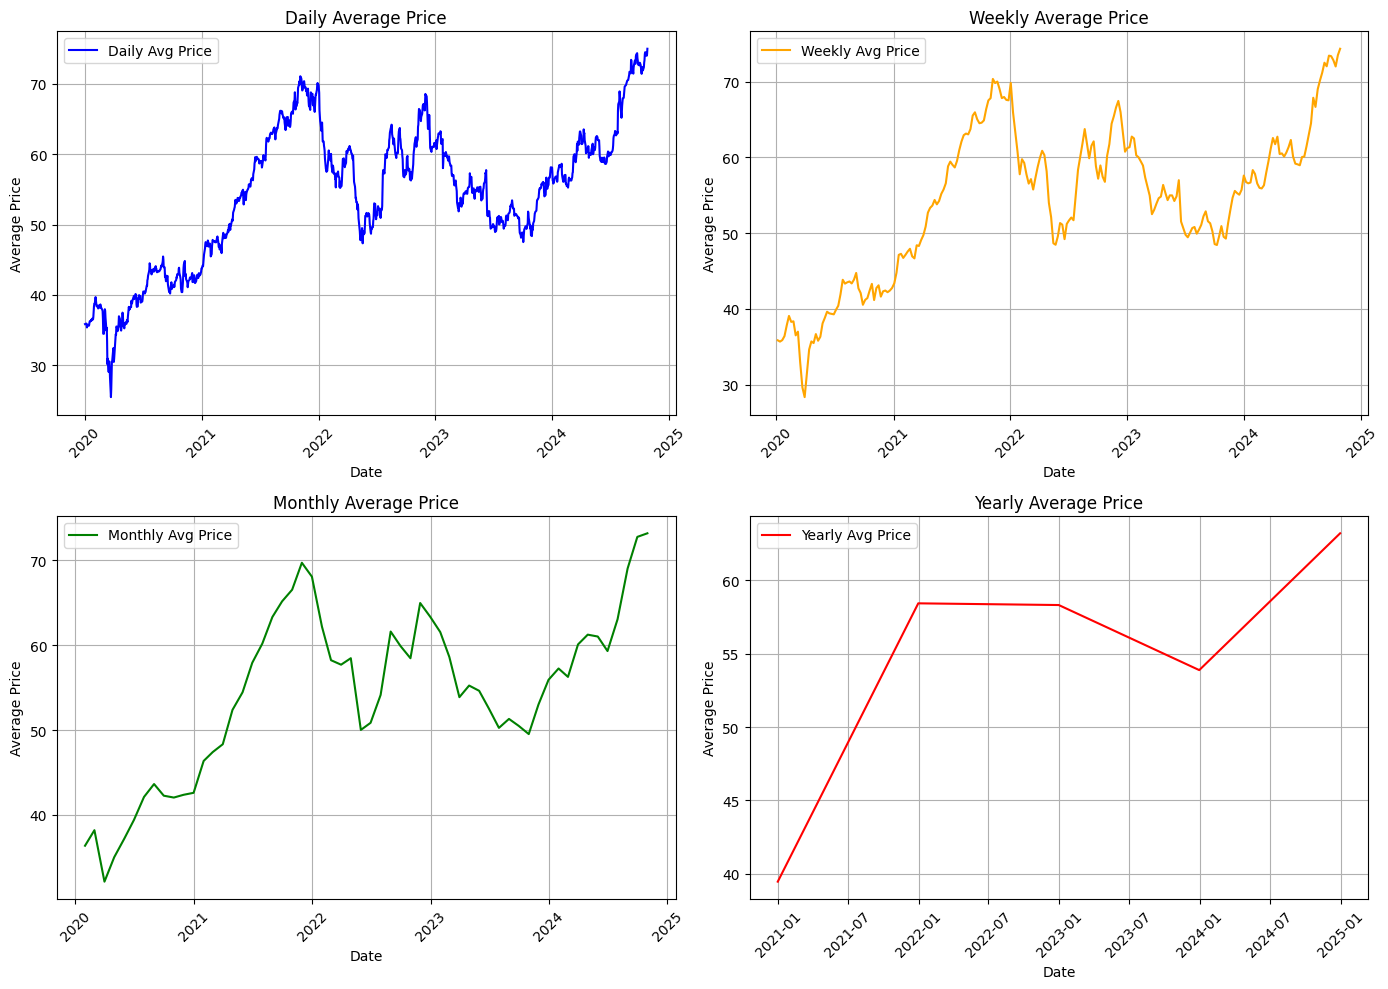

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting all average prices
plt.figure(figsize=(14, 10))

# Daily Average Price
plt.subplot(2, 2, 1)
plt.plot(daily_avg.index, daily_avg, label='Daily Avg Price', color='blue')
plt.title('Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Weekly Average Price
plt.subplot(2, 2, 2)
plt.plot(weekly_avg.index, weekly_avg, label='Weekly Avg Price', color='orange')
plt.title('Weekly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Monthly Average Price
plt.subplot(2, 2, 3)
plt.plot(monthly_avg.index, monthly_avg, label='Monthly Avg Price', color='green')
plt.title('Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Yearly Average Price
plt.subplot(2, 2, 4)
plt.plot(yearly_avg.index, yearly_avg, label='Yearly Avg Price', color='red')
plt.title('Yearly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
